In [1]:
import pandas as pd

In [2]:
# read bitcoin data
df_btc = pd.read_csv("./data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [3]:
df_btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_btc = df_btc.dropna()

In [5]:
df_btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [6]:
df_btc["Timestamp"].count()

3613769

In [7]:
# leave timestamp and close columns
df_btc_clean = df_btc[["Timestamp", "Close"]]

In [8]:
df_btc_clean.head()

,Timestamp,Close
0,1325317920,4.39
478,1325346600,4.39
547,1325350740,4.57
548,1325350800,4.58
1224,1325391360,4.58


In [9]:
df_btc_clean.dtypes

Timestamp      int64
Close        float64
dtype: object

In [10]:
# timestamp to date and time
df_btc_clean["DateTime"] = pd.to_datetime(df_btc_clean['Timestamp'],unit='s')
df_btc_clean["Date"] = df_btc_clean["DateTime"].dt.date
df_btc_clean["Time"] = df_btc_clean["DateTime"].dt.time

<ipython-input-10-65c6fa700f98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_clean["DateTime"] = pd.to_datetime(df_btc_clean['Timestamp'],unit='s')
<ipython-input-10-65c6fa700f98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_clean["Date"] = df_btc_clean["DateTime"].dt.date
<ipython-input-10-65c6fa700f98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [11]:
df_btc_clean.head()

,Timestamp,Close,DateTime,Date,Time
0,1325317920,4.39,2011-12-31 07:52:00,2011-12-31,07:52:00
478,1325346600,4.39,2011-12-31 15:50:00,2011-12-31,15:50:00
547,1325350740,4.57,2011-12-31 16:59:00,2011-12-31,16:59:00
548,1325350800,4.58,2011-12-31 17:00:00,2011-12-31,17:00:00
1224,1325391360,4.58,2012-01-01 04:16:00,2012-01-01,04:16:00


In [12]:
df_btc_clean.dtypes

Timestamp             int64
Close               float64
DateTime     datetime64[ns]
Date                 object
Time                 object
dtype: object

In [13]:
# delete useless columns
df_btc_clean = df_btc_clean[["Date","Time", "Close"]]
df_btc_clean.head()

,Date,Time,Close
0,2011-12-31,07:52:00,4.39
478,2011-12-31,15:50:00,4.39
547,2011-12-31,16:59:00,4.57
548,2011-12-31,17:00:00,4.58
1224,2012-01-01,04:16:00,4.58


In [14]:
# reset index and show
df_btc_clean =df_btc_clean.reset_index(drop=True)
df_btc_clean.head()

,Date,Time,Close
0,2011-12-31,07:52:00,4.39
1,2011-12-31,15:50:00,4.39
2,2011-12-31,16:59:00,4.57
3,2011-12-31,17:00:00,4.58
4,2012-01-01,04:16:00,4.58


In [15]:
# get the close value by using the max time of a date 
df_btc_close = df_btc_clean.groupby("Date").max("Time")
df_btc_close.head()

,Close
Date,
2011-12-31,4.58
2012-01-01,5.00
2012-01-02,5.00
2012-01-03,5.32
2012-01-04,5.57


In [16]:
# sort by date
df_btc_close.sort_values(by="Date")

,Close
Date,
2011-12-31,4.58
2012-01-01,5.00
2012-01-02,5.00
2012-01-03,5.32
2012-01-04,5.57
...,...
2021-03-27,56591.90
2021-03-28,56545.59
2021-03-29,58309.35


In [17]:
# reset index again
df_btc_close = df_btc_close.reset_index()

In [18]:
df_btc_close.head()

,Date,Close
0,2011-12-31,4.58
1,2012-01-01,5.00
2,2012-01-02,5.00
3,2012-01-03,5.32
4,2012-01-04,5.57


In [19]:
# get date index, for testing purpose
df_btc_close.index[df_btc_close["Date"] == min(df_btc_close["Date"])][0]

0

In [20]:
# moving avarage calculation function
def ma(df_source, date, n_days):
    index = df_source.index[df_source["Date"] == date][0]
    df = None
    if index == 0:
        df = df_source.iloc[0]
    elif index - n_days >= 0:
        df = df_source.iloc[index - n_days + 1 : index+1]
    else:
        df = df_source.iloc[0 : index + 1]
    return df["Close"].mean()

In [21]:
# compare price
def closediff(df_source, col, date):
    index = df_source.index[df_source["Date"] == date][0]
    diff = 0
    if index == 0:
        diff = 0
    else:
        diff = df_source.iloc[index][col] - df_source.iloc[index - 1][col]
    return diff

In [22]:
def diffpct(df_source, col, date):
    index = df_source.index[df_source["Date"] == date][0]
    diff = 0
    if index == 0:
        diff = 0
    else:
        diff = (df_source.iloc[index][col] - df_source.iloc[index - 1][col])/df_source.iloc[index - 1][col]
    return diff

In [23]:
# test the function
from datetime import datetime, timedelta
#d = min(df_close["Date"] + timedelta(days=5))
#print(d)
#ma(d, 5)

# test closediff
#d = min(df_btc_close["Date"] + timedelta(days=1))
d = max(df_btc_close["Date"])
print(d)
closediff(df_btc_close, "Close", d)

2021-03-31


-593.6800000000003

In [24]:
# test the function
#ma(d, 5)["Close"].mean()

In [25]:
# make a copy of the df
df_btc_close_ma = df_btc_close.copy()

In [26]:
# add different ma point to each date
ma_days = [5, 10, 20, 30, 60, 90, 180, 240, 360]
for ma_day in ma_days:
    column_name = f"ma_{ma_day}"
    df_btc_close_ma[column_name] = df_btc_close_ma.apply(lambda x: ma(df_btc_close_ma, x["Date"], ma_day), axis=1)

In [27]:
#df_btc_close_ma["diff"] = df_btc_close_ma.apply(lambda x: closediff(df_btc_close_ma, "Close", x["Date"]), axis=1)

In [28]:
df_btc_close_ma

,Date,Close,ma_5,ma_10,ma_20,ma_30,ma_60,ma_90,ma_180,ma_240,ma_360
0,2011-12-31,4.58,4.580,4.580,4.5800,4.580000,4.580000,4.580000,4.580000,4.580000,4.580000
1,2012-01-01,5.00,4.790,4.790,4.7900,4.790000,4.790000,4.790000,4.790000,4.790000,4.790000
2,2012-01-02,5.00,4.860,4.860,4.8600,4.860000,4.860000,4.860000,4.860000,4.860000,4.860000
3,2012-01-03,5.32,4.975,4.975,4.9750,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000
4,2012-01-04,5.57,5.094,5.094,5.0940,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000
...,...,...,...,...,...,...,...,...,...,...,...
3371,2021-03-27,56591.90,55574.128,57420.123,57748.1875,55094.464333,50379.645833,45403.998111,30956.614167,26057.659250,20389.960639
3372,2021-03-28,56545.59,55718.246,57068.813,57954.0770,55364.072000,50779.072333,45727.585667,31210.446278,26245.553042,20526.935611
3373,2021-03-29,58309.35,55952.392,56955.536,58122.9400,55696.360667,51186.950500,46071.089667,31474.137111,26438.996500,20669.351833
3374,2021-03-30,59371.86,57183.586,56907.024,58224.6975,56121.904667,51532.865000,46408.583889,31743.341889,26635.989708,20814.928028


In [29]:
# load other data
# load gold
df_gold = pd.read_csv("./data/All/Gold.csv", parse_dates=["Date"])
df_gold.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-12,$23.53,14419620,$23.95,$24.18,$23.4328
1,2021-05-11,$23.95,13963030,$23.48,$24.03,$23.39
2,2021-05-10,$23.93,19519240,$24.23,$24.44,$23.915
3,2021-05-07,$23.92,24229350,$23.96,$24.155,$23.59
4,2021-05-06,$23.55,34497240,$22.58,$23.595,$22.57


In [30]:
df_gold.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

In [31]:
df_gold["Date"] = df_gold["Date"].dt.date

In [32]:
df_gold.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [33]:
df_gold.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-12,$23.53,14419620,$23.95,$24.18,$23.4328
1,2021-05-11,$23.95,13963030,$23.48,$24.03,$23.39
2,2021-05-10,$23.93,19519240,$24.23,$24.44,$23.915
3,2021-05-07,$23.92,24229350,$23.96,$24.155,$23.59
4,2021-05-06,$23.55,34497240,$22.58,$23.595,$22.57


In [34]:
df_gold_clean = df_gold[["Date", "Close/Last"]]
df_gold_clean.columns = ["Date", "Gold"]
df_gold_clean["Gold"] = df_gold_clean["Gold"].str[1:]
df_gold_clean["Gold"] = df_gold_clean["Gold"].astype("float")

<ipython-input-34-520607c9709d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gold_clean["Gold"] = df_gold_clean["Gold"].str[1:]
<ipython-input-34-520607c9709d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gold_clean["Gold"] = df_gold_clean["Gold"].astype("float")


In [35]:
df_combine = df_btc_close_ma.merge(df_gold_clean, on="Date")

In [36]:
df_combine

,Date,Close,ma_5,ma_10,ma_20,ma_30,ma_60,ma_90,ma_180,ma_240,ma_360,Gold
0,2012-01-03,5.32,4.975,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,47.51
1,2012-01-04,5.57,5.094,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,48.22
2,2012-01-05,6.65,5.508,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,48.02
3,2012-01-06,6.90,5.888,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,47.54
4,2012-01-09,6.90,6.850,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,47.71
...,...,...,...,...,...,...,...,...,...,...,...,...
2318,2021-03-25,53215.89,56630.462,57838.548000,57195.101500,54819.966333,49647.496833,44775.390222,30456.917389,25686.164083,20116.416167,19.73
2319,2021-03-26,55099.23,55928.948,57657.637000,57490.113000,54943.582667,49985.099500,45090.086333,30703.011889,25868.469792,20251.342167,20.00
2320,2021-03-29,58309.35,55952.392,56955.536000,58122.940000,55696.360667,51186.950500,46071.089667,31474.137111,26438.996500,20669.351833,20.16
2321,2021-03-30,59371.86,57183.586,56907.024000,58224.697500,56121.904667,51532.865000,46408.583889,31743.341889,26635.989708,20814.928028,19.51


In [37]:
# load NASDAQ Composite Index
df_nasdaq = pd.read_csv("./data/All/Nasdaq_COMP.csv", parse_dates=["Date"])
df_nasdaq.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-12,13031.68,--,13215.49,13288.61,13002.54
1,2021-05-11,13389.43,--,13363.99,13423.31,13107.67
2,2021-05-10,13401.86,--,13687.59,13687.93,13401.74
3,2021-05-07,13752.24,--,13723.09,13828.62,13690.75
4,2021-05-06,13632.84,--,13557.83,13635.73,13439.39


In [38]:
df_nasdaq["Date"] = df_nasdaq["Date"].dt.date

In [39]:
df_nasdaq_clean = df_nasdaq[["Date", "Close/Last"]]
df_nasdaq_clean.columns = ["Date", "Nasdaq_Comp"]
df_nasdaq_clean.head()

,Date,Nasdaq_Comp
0,2021-05-12,13031.68
1,2021-05-11,13389.43
2,2021-05-10,13401.86
3,2021-05-07,13752.24
4,2021-05-06,13632.84


In [40]:
df_combine = df_combine.merge(df_nasdaq_clean, on="Date")
df_combine.head()

,Date,Close,ma_5,ma_10,ma_20,ma_30,ma_60,ma_90,ma_180,ma_240,ma_360,Gold,Nasdaq_Comp
0,2012-01-03,5.32,4.975,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,47.51,2648.72
1,2012-01-04,5.57,5.094,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,48.22,2648.36
2,2012-01-05,6.65,5.508,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,48.02,2669.86
3,2012-01-06,6.90,5.888,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,47.54,2674.22
4,2012-01-09,6.90,6.850,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,47.71,2676.56


In [41]:
# SP500
df_sp500 = pd.read_csv("./data/All/SP500.csv", parse_dates=["Date"])
df_sp500.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-12,4063.04,--,4130.55,4134.73,4056.88
1,2021-05-11,4152.10,--,4150.34,4162.04,4111.53
2,2021-05-10,4188.43,--,4228.29,4236.39,4188.13
3,2021-05-07,4232.60,--,4210.34,4238.04,4201.64
4,2021-05-06,4201.62,--,4169.14,4202.70,4147.33


In [42]:
df_sp500["Date"] = df_sp500["Date"].dt.date

In [43]:
df_sp500_clean = df_sp500[["Date", "Close/Last"]]
df_sp500_clean.columns = ["Date", "SP500"]
df_sp500_clean.head()

,Date,SP500
0,2021-05-12,4063.04
1,2021-05-11,4152.10
2,2021-05-10,4188.43
3,2021-05-07,4232.60
4,2021-05-06,4201.62


In [44]:
df_combine = df_combine.merge(df_sp500_clean, on="Date")

In [45]:
df_combine.head()

,Date,Close,ma_5,ma_10,ma_20,ma_30,ma_60,ma_90,ma_180,ma_240,ma_360,Gold,Nasdaq_Comp,SP500
0,2012-01-03,5.32,4.975,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,47.51,2648.72,1277.06
1,2012-01-04,5.57,5.094,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,48.22,2648.36,1277.30
2,2012-01-05,6.65,5.508,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,48.02,2669.86,1281.06
3,2012-01-06,6.90,5.888,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,47.54,2674.22,1277.81
4,2012-01-09,6.90,6.850,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,47.71,2676.56,1280.70


In [46]:
# Dow Industrials
df_indu = pd.read_csv("./data/All/DowIndu.csv", parse_dates=["Date"])

In [47]:
df_indu.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-12,33587.66,383577786,34206.40,34207.87,33555.22
1,2021-05-11,34269.16,413181901,34572.74,34572.74,34075.31
2,2021-05-10,34742.82,370038457,34785.27,35091.56,34741.57
3,2021-05-07,34777.76,311627548,34578.27,34811.39,34464.31
4,2021-05-06,34548.53,317117461,34245.11,34561.29,34185.06


In [48]:
df_indu["Date"] = df_indu["Date"].dt.date

In [49]:
df_indu_clean = df_indu[["Date", "Close/Last"]]

In [50]:
df_indu_clean.columns=["Date", "INDU"]

In [51]:
df_indu_clean.head()

,Date,INDU
0,2021-05-12,33587.66
1,2021-05-11,34269.16
2,2021-05-10,34742.82
3,2021-05-07,34777.76
4,2021-05-06,34548.53


In [52]:
df_combine = df_combine.merge(df_indu_clean, on="Date")

In [53]:
df_combine

,Date,Close,ma_5,ma_10,ma_20,ma_30,ma_60,ma_90,ma_180,ma_240,ma_360,Gold,Nasdaq_Comp,SP500,INDU
0,2012-01-03,5.32,4.975,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,47.51,2648.72,1277.06,12397.38
1,2012-01-04,5.57,5.094,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,48.22,2648.36,1277.30,12418.42
2,2012-01-05,6.65,5.508,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,48.02,2669.86,1281.06,12415.70
3,2012-01-06,6.90,5.888,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,47.54,2674.22,1277.81,12359.92
4,2012-01-09,6.90,6.850,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,47.71,2676.56,1280.70,12392.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,2021-03-25,53215.89,56630.462,57838.548000,57195.101500,54819.966333,49647.496833,44775.390222,30456.917389,25686.164083,20116.416167,19.73,12977.68,3909.52,32619.48
2319,2021-03-26,55099.23,55928.948,57657.637000,57490.113000,54943.582667,49985.099500,45090.086333,30703.011889,25868.469792,20251.342167,20.00,13138.72,3974.54,33072.88
2320,2021-03-29,58309.35,55952.392,56955.536000,58122.940000,55696.360667,51186.950500,46071.089667,31474.137111,26438.996500,20669.351833,20.16,13059.65,3971.09,33171.37
2321,2021-03-30,59371.86,57183.586,56907.024000,58224.697500,56121.904667,51532.865000,46408.583889,31743.341889,26635.989708,20814.928028,19.51,13045.39,3958.55,33066.96


In [54]:
# Oil
df_oil = pd.read_csv("./data/All/Oil.csv", parse_dates=["Date"])
df_oil.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-12,19.575,58066.0,19.56,19.8190,19.550
1,2021-05-11,19.490,61585.0,19.09,19.4900,19.081
2,2021-05-10,19.300,47977.0,19.47,19.4700,19.010
3,2021-05-07,19.230,18457.0,19.01,19.3299,19.000
4,2021-05-06,19.249,16073.0,19.45,19.4500,19.120


In [55]:
df_oil["Date"] = df_oil["Date"].dt.date

In [56]:
df_oil_clean = df_oil[["Date", "Close/Last"]]
df_oil_clean.columns = ["Date", "Oil"]
df_oil_clean.head()

,Date,Oil
0,2021-05-12,19.575
1,2021-05-11,19.490
2,2021-05-10,19.300
3,2021-05-07,19.230
4,2021-05-06,19.249


In [57]:
df_combine = df_combine.merge(df_oil_clean, on="Date")

In [58]:
df_combine.head()

,Date,Close,ma_5,ma_10,ma_20,ma_30,ma_60,ma_90,ma_180,ma_240,ma_360,Gold,Nasdaq_Comp,SP500,INDU,Oil
0,2012-01-03,5.32,4.975,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,47.51,2648.72,1277.06,12397.38,43.9707
1,2012-01-04,5.57,5.094,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,48.22,2648.36,1277.30,12418.42,44.8500
2,2012-01-05,6.65,5.508,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,48.02,2669.86,1281.06,12415.70,44.8500
3,2012-01-06,6.90,5.888,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,47.54,2674.22,1277.81,12359.92,44.8500
4,2012-01-09,6.90,6.850,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,47.71,2676.56,1280.70,12392.69,44.8500


In [59]:
df_combine_diff = df_combine.copy()

In [60]:
df_combine_diff["Btc_diff"] = df_combine_diff.apply(lambda x: closediff(df_combine_diff, "Close", x["Date"]), axis=1)

In [61]:
df_combine_diff["Gold_diff"] = df_combine_diff.apply(lambda x: closediff(df_combine_diff, "Gold", x["Date"]), axis=1)

In [62]:
df_combine_diff["Nasdaq_diff"] = df_combine_diff.apply(lambda x: closediff(df_combine_diff, "Nasdaq_Comp", x["Date"]), axis=1)

In [63]:
df_combine_diff["SP500_diff"] = df_combine_diff.apply(lambda x: closediff(df_combine_diff, "SP500", x["Date"]), axis=1)

In [64]:
df_combine_diff["INDU_diff"] = df_combine_diff.apply(lambda x: closediff(df_combine_diff, "INDU", x["Date"]), axis=1)

In [65]:
df_combine_diff["Oil_diff"] = df_combine_diff.apply(lambda x: closediff(df_combine_diff, "Oil", x["Date"]), axis=1)

In [66]:
df_combine_diff

,Date,Close,ma_5,ma_10,ma_20,ma_30,ma_60,ma_90,ma_180,ma_240,...,Nasdaq_Comp,SP500,INDU,Oil,Btc_diff,Gold_diff,Nasdaq_diff,SP500_diff,INDU_diff,Oil_diff
0,2012-01-03,5.32,4.975,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,4.975000,...,2648.72,1277.06,12397.38,43.9707,0.00,0.00,0.00,0.00,0.00,0.0000
1,2012-01-04,5.57,5.094,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,5.094000,...,2648.36,1277.30,12418.42,44.8500,0.25,0.71,-0.36,0.24,21.04,0.8793
2,2012-01-05,6.65,5.508,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,5.353333,...,2669.86,1281.06,12415.70,44.8500,1.08,-0.20,21.50,3.76,-2.72,0.0000
3,2012-01-06,6.90,5.888,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,5.574286,...,2674.22,1277.81,12359.92,44.8500,0.25,-0.48,4.36,-3.25,-55.78,0.0000
4,2012-01-09,6.90,6.850,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,5.972000,...,2676.56,1280.70,12392.69,44.8500,0.00,0.17,2.34,2.89,32.77,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,2021-03-25,53215.89,56630.462,57838.548000,57195.101500,54819.966333,49647.496833,44775.390222,30456.917389,25686.164083,...,12977.68,3909.52,32619.48,17.2600,-3922.73,-0.43,15.79,20.38,199.42,-0.6600
2319,2021-03-26,55099.23,55928.948,57657.637000,57490.113000,54943.582667,49985.099500,45090.086333,30703.011889,25868.469792,...,13138.72,3974.54,33072.88,17.9100,1883.34,0.27,161.04,65.02,453.40,0.6500
2320,2021-03-29,58309.35,55952.392,56955.536000,58122.940000,55696.360667,51186.950500,46071.089667,31474.137111,26438.996500,...,13059.65,3971.09,33171.37,18.0900,3210.12,0.16,-79.07,-3.45,98.49,0.1800
2321,2021-03-30,59371.86,57183.586,56907.024000,58224.697500,56121.904667,51532.865000,46408.583889,31743.341889,26635.989708,...,13045.39,3958.55,33066.96,17.7385,1062.51,-0.65,-14.26,-12.54,-104.41,-0.3515


In [67]:
df_combine_diff["Btc_diffpct"] = df_combine_diff.apply(lambda x: diffpct(df_combine_diff, "Close", x["Date"]), axis=1)

In [68]:
df_combine_diff["Gold_diffpct"] = df_combine_diff.apply(lambda x: diffpct(df_combine_diff, "Gold", x["Date"]), axis=1)
df_combine_diff["Nasdaq_diffpct"] = df_combine_diff.apply(lambda x: diffpct(df_combine_diff, "Nasdaq_Comp", x["Date"]), axis=1)
df_combine_diff["SP500_diffpct"] = df_combine_diff.apply(lambda x: diffpct(df_combine_diff, "SP500", x["Date"]), axis=1)
df_combine_diff["INDU_diffpct"] = df_combine_diff.apply(lambda x: diffpct(df_combine_diff, "INDU", x["Date"]), axis=1)
df_combine_diff["Oil_diffpct"] = df_combine_diff.apply(lambda x: diffpct(df_combine_diff, "Oil", x["Date"]), axis=1)

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

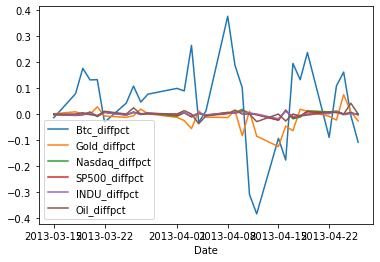

In [70]:
fig, ax = plt.subplots()
#df_combine_diff.plot.line(x="Date",y=["Btc_diffpct","Gold_diffpct","Nasdaq_diffpct","SP500_diffpct","INDU_diffpct","Oil_diffpct"], ax=ax)
df_filter = df_combine_diff.iloc[300:330]
df_filter.plot.line(x="Date",y=["Btc_diffpct","Gold_diffpct","Nasdaq_diffpct","SP500_diffpct","INDU_diffpct","Oil_diffpct"], ax=ax)

<AxesSubplot:xlabel='Date'>

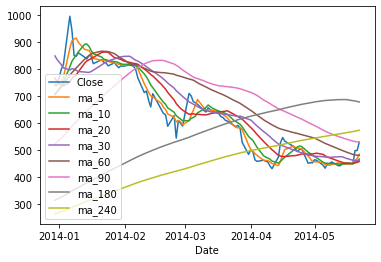

In [71]:
df_filter2 = df_combine_diff.iloc[500:600]
df_filter2.plot.line(x="Date", y=["Close", "ma_5", "ma_10", "ma_20", "ma_30", "ma_60", "ma_90", "ma_180", "ma_240"])

In [74]:
df_combine_diff.to_csv("./combine.csv", index = False)